In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from textblob import TextBlob
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.mixture import GaussianMixture as GMM

from topic_meta_data import add_features_to_topics
import clean_filter_text as cft
from input_pipeline import nmf_obj

In [2]:
reviews = pd.read_csv('../raw_data/deceptive-opinion.csv')
y = reviews['deceptive']
x = reviews.drop('deceptive', axis=1)
x_tv, x_te, y_tv, y_te = train_test_split(x, y, test_size=0.2, random_state=444)
x_tr, x_va, y_tr, y_va = train_test_split(x_tv, y_tv, test_size=0.25, random_state=444)

In [21]:
#file_df = pd.read_pickle('../pickles/clean_hotel_reviews.pkl')

In [3]:
file_df = cft.main_clean(x_tv)

In [4]:
bigram_nmf = nmf_obj()
bigram_nmf.init_tfidf(ngram=(1,2))
bigram_nmf.init_tdm(file_df)
bigram_nmf.init_nmf(5)
bigram_nmf.display_topics()
bigram_df = bigram_nmf.export_topic_df()

        0         1            2       3        4
0  servic      like        hotel  luxuri   experi
1   check      desk       reserv    told     time
2   night  bathroom          bed   floor     good
3   staff  friendli        clean    help  definit
4   great     locat  great locat    view     nice


In [5]:
def kmeans_cluster(k, data):
    km = KMeans(n_clusters=k, random_state=444)
    km.fit_predict(data)
    return km

# Bi-gram x_train

In [6]:
bigram_df

,"servic,like,hotel,luxuri,experi","check,desk,reserv,told,time","night,bathroom,bed,floor,good","staff,friendli,clean,help,definit","great,locat,great locat,view,nice"
0,0.088440,0.000000,0.105072,0.074116,0.022476
1,0.055045,0.000000,0.036732,0.046219,0.091033
2,0.043661,0.020250,0.063782,0.133419,0.000000
3,0.110640,0.046923,0.000000,0.080285,0.000000
4,0.000000,0.073650,0.037476,0.033681,0.063005
...,...,...,...,...,...
1275,0.023290,0.000000,0.042605,0.094323,0.029520
1276,0.007565,0.091834,0.000000,0.119309,0.000000
1277,0.074850,0.006297,0.000000,0.085126,0.065541
1278,0.075410,0.070963,0.000000,0.000000,0.023355


In [7]:
x_tv

,hotel,polarity,source,text
318,james,positive,TripAdvisor,My significant other and I recently spent 3 ni...
80,sheraton,positive,TripAdvisor,The sheraton was a wonderful hotel! When me an...
367,allegro,positive,TripAdvisor,If you're in Chicago and want to stay in The L...
1543,amalfi,negative,MTurk,When my husband and I went to Amalfi Hotel we ...
386,intercontinental,positive,TripAdvisor,We became an Ambassador member just before spe...
...,...,...,...,...
67,conrad,positive,TripAdvisor,My husband and I stayed here for New Years eve...
1288,swissotel,negative,MTurk,We planned a fun time for our kids this summer...
791,amalfi,positive,MTurk,The Amalfi Hotel Chicago is perfect for a roma...
1136,amalfi,negative,Web,this is my letter to the management..... Sir o...


In [8]:
x_feat = add_features_to_topics(bigram_df, x_tv)

In [9]:
x_feat

,"servic,like,hotel,luxuri,experi","check,desk,reserv,told,time","night,bathroom,bed,floor,good","staff,friendli,clean,help,definit","great,locat,great locat,view,nice",tb_subjective,polarity
318,0.088440,0.000000,0.105072,0.074116,0.022476,0.505855,1
80,0.055045,0.000000,0.036732,0.046219,0.091033,0.835714,1
367,0.043661,0.020250,0.063782,0.133419,0.000000,0.623347,1
1543,0.110640,0.046923,0.000000,0.080285,0.000000,0.600541,0
386,0.000000,0.073650,0.037476,0.033681,0.063005,0.577341,1
...,...,...,...,...,...,...,...
67,0.023290,0.000000,0.042605,0.094323,0.029520,0.586039,1
1288,0.007565,0.091834,0.000000,0.119309,0.000000,0.375358,0
791,0.074850,0.006297,0.000000,0.085126,0.065541,0.764286,1
1136,0.075410,0.070963,0.000000,0.000000,0.023355,0.328571,0


In [10]:
scaler = StandardScaler()
x_feat_sc = scaler.fit_transform(x_feat)

In [11]:
bigram_k=8
bigram_cluster = kmeans_cluster(bigram_k, x_feat_sc)
x_feat['cluster'] = bigram_cluster.labels_
x_feat['target'] = y_tv

In [12]:
bigram_cc = bigram_cluster.cluster_centers_

In [13]:
bigram_gmm = GMM(n_components=8, covariance_type='spherical', max_iter=1000, means_init=bigram_cc, 
          random_state=444).fit(x_feat_sc)
bigram_labels = bigram_gmm.predict(x_feat_sc)
bigram_gmm_df = x_feat.copy()

In [14]:
bigram_gmm_df['target'] = y_tv.map({'truthful':0, 'deceptive':1})

In [15]:
bigram_gmm_df.cluster.value_counts()

6    198
3    183
7    178
2    177
4    169
5    146
1    142
0     87
Name: cluster, dtype: int64

In [16]:
bigram_analysis = pd.crosstab(index=bigram_gmm_df['cluster'],columns=bigram_gmm_df['target'],
            values=bigram_gmm_df['target'], aggfunc='count')
bigram_analysis['% Deceptive'] = bigram_analysis[1] / (bigram_analysis[1]\
                                                                      +bigram_analysis[0])
bigram_analysis

target,0,1,% Deceptive
cluster,,,
0,32,55,0.632184
1,92,50,0.352113
2,69,108,0.610169
3,40,143,0.781421
4,71,98,0.579882
5,124,22,0.150685
6,144,54,0.272727
7,68,110,0.617978


In [17]:
bigram_gmm_df['predict'] = bigram_gmm_df['cluster'].map({0:1, 1:0, 2:1, 3:1, 4:0, 5:0, 6:0, 7:1})

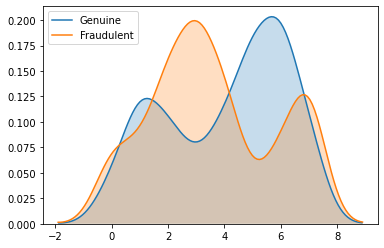

In [18]:
sns.kdeplot(bigram_gmm_df[bigram_gmm_df['target'] == 0].cluster, 
            shade=True, label='Genuine')
sns.kdeplot(bigram_gmm_df[bigram_gmm_df['target'] == 1].cluster, 
            shade=True, label='Fraudulent')

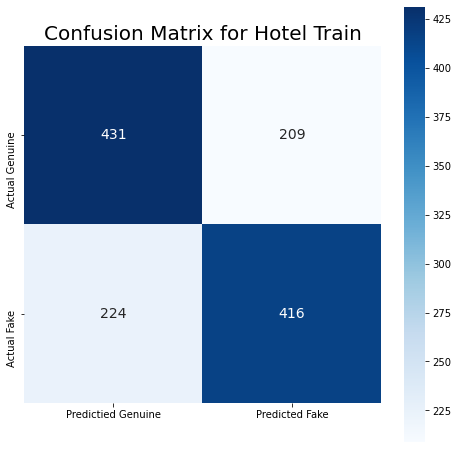

In [19]:
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix for Hotel Train', fontsize=20)
ylabel = ['Actual Genuine', 'Actual Fake']
xlabel = ['Predictied Genuine', 'Predicted Fake']
bigram_cm = cm(bigram_gmm_df['target'], bigram_gmm_df['predict'])
sns.heatmap(bigram_cm, annot=True, fmt='d', xticklabels=xlabel, yticklabels=ylabel,
            annot_kws={'size':14}, cmap='Blues', square=True)
# plt.savefig('../ppt/Hotel_CM_train.png')

In [20]:
f1_score(bigram_gmm_df['target'], bigram_gmm_df['predict'])

0.6577075098814229

# Bi-gram Testing

In [21]:
xva_file_df = cft.main_clean(x_te)
xva_nmf = nmf_obj()
xva_nmf.tdm = bigram_nmf.tfidf.transform(xva_file_df)
xva_nmf.nmf_topic = bigram_nmf.nmf.transform(xva_nmf.tdm)

xva_nmf.nmf = bigram_nmf.nmf
xva_nmf.tfidf = bigram_nmf.tfidf
xva_nmf.feature_names = bigram_nmf.feature_names
xva_nmf.display_topics()

        0         1            2       3        4
0  servic      like        hotel  luxuri   experi
1   check      desk       reserv    told     time
2   night  bathroom          bed   floor     good
3   staff  friendli        clean    help  definit
4   great     locat  great locat    view     nice


In [22]:
xva_df = xva_nmf.export_topic_df()

In [23]:
xva_feat = add_features_to_topics(xva_df, x_te)
xva_feat_sc = scaler.transform(xva_feat)

In [24]:
bigram_cluster_pred = bigram_gmm.predict_proba(xva_feat_sc)

In [25]:
xva_clust_pred = bigram_gmm.predict(xva_feat_sc)
xva_bigram_result = xva_feat.copy()
xva_bigram_result['cluster'] = xva_clust_pred
xva_bigram_result['target'] = y_te.map({'truthful':0, 'deceptive':1})

In [26]:
xva_bigram_result['predict'] = xva_bigram_result['cluster'].map({0:0, 1:0, 2:1, 3:1, 4:0, 5:0, 6:0, 7:1})

In [ ]:
# 0, 2, 3, 7 are deceptive leaning
# 1, 4, 5, 6 are genuine leaning

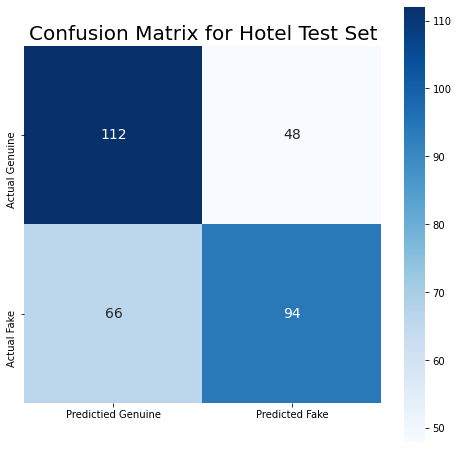

In [28]:
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix for Hotel Test Set', fontsize=20)
ylabel = ['Actual Genuine', 'Actual Fake']
xlabel = ['Predictied Genuine', 'Predicted Fake']
bigram_cm = cm(xva_bigram_result['target'], xva_bigram_result['predict'])
sns.heatmap(bigram_cm, annot=True, fmt='d', xticklabels=xlabel, yticklabels=ylabel,
            annot_kws={'size':14}, cmap='Blues', square=True)
# plt.savefig('../ppt/Hotel_CM_test.png')

In [29]:
f1_score(xva_bigram_result['target'], xva_bigram_result['predict'])

0.6225165562913908

# Uni-gram model training (topics only)

In [30]:
unigram_nmf = nmf_obj()
unigram_nmf.init_tfidf(ngram=(1,1))
unigram_nmf.init_tdm(file_df)
unigram_nmf.init_nmf(5)
unigram_nmf.display_topics()

        0         1       2      3        4
0  servic      like   hotel  place   luxuri
1   check      desk  reserv   told    minut
2   night  bathroom     bed  floor     good
3   staff  friendli   clean   help  definit
4   great     locat    view   citi     shop


In [31]:
unigram_df = unigram_nmf.export_topic_df()
unigram_df.index = x_tv.index
unigram_df

,"servic,like,hotel,place,luxuri","check,desk,reserv,told,minut","night,bathroom,bed,floor,good","staff,friendli,clean,help,definit","great,locat,view,citi,shop"
318,0.086677,0.000000,0.103176,0.073894,0.019795
80,0.047617,0.000000,0.041958,0.048111,0.090459
367,0.041398,0.027921,0.051893,0.130113,0.000000
1543,0.109079,0.048065,0.000000,0.074959,0.000000
386,0.000000,0.073900,0.035556,0.033154,0.064217
...,...,...,...,...,...
67,0.021695,0.000000,0.043046,0.095110,0.022770
1288,0.016320,0.090683,0.000000,0.098332,0.000000
791,0.056205,0.012513,0.000000,0.091877,0.068837
1136,0.069074,0.075643,0.000000,0.000000,0.026429


In [32]:
unigram_k=5
unigram_cluster = kmeans_cluster(unigram_k, unigram_df)
unigram_result = unigram_df.copy()
unigram_result['cluster'] = unigram_cluster.labels_
unigram_result['target'] = y_tv

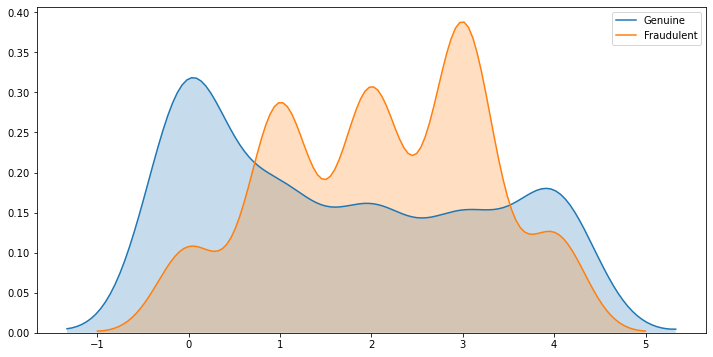

In [33]:
plt.figure(figsize=(12,6))
# Title: KDE for Uni-gram Topic Clustering
sns.kdeplot(unigram_result[unigram_result['target'] == 'truthful'].cluster, 
            shade=True, label='Genuine')
sns.kdeplot(unigram_result[unigram_result['target'] == 'deceptive'].cluster, 
            shade=True, label='Fraudulent')

In [34]:
uni_cc = unigram_cluster.cluster_centers_
uni_gmm = GMM(n_components=5, covariance_type='spherical', max_iter=1000,means_init=uni_cc, 
          random_state=444).fit(unigram_df)
labels = uni_gmm.predict(unigram_df)
uni_gmm_df = unigram_df.copy()
uni_gmm_df['cluster']=pd.Series(labels, index=unigram_df.index)
uni_gmm_df['target'] = y_tv.map({'truthful':0, 'deceptive':1})

In [35]:
uni_gmm_df['predict'] = uni_gmm_df['cluster'].map({0:0, 1:0, 2:1, 3:1, 4:0})

In [36]:
uni_gmm_df

,"servic,like,hotel,place,luxuri","check,desk,reserv,told,minut","night,bathroom,bed,floor,good","staff,friendli,clean,help,definit","great,locat,view,citi,shop",cluster,target,predict
318,0.086677,0.000000,0.103176,0.073894,0.019795,0,0,0
80,0.047617,0.000000,0.041958,0.048111,0.090459,4,0,0
367,0.041398,0.027921,0.051893,0.130113,0.000000,2,0,1
1543,0.109079,0.048065,0.000000,0.074959,0.000000,3,1,1
386,0.000000,0.073900,0.035556,0.033154,0.064217,4,0,0
...,...,...,...,...,...,...,...,...
67,0.021695,0.000000,0.043046,0.095110,0.022770,2,0,1
1288,0.016320,0.090683,0.000000,0.098332,0.000000,2,1,1
791,0.056205,0.012513,0.000000,0.091877,0.068837,2,1,1
1136,0.069074,0.075643,0.000000,0.000000,0.026429,3,0,1


In [37]:
unigram_analysis = pd.crosstab(index=uni_gmm_df['cluster'],columns=uni_gmm_df['target'],
            values=uni_gmm_df['target'], aggfunc='count')
unigram_analysis['% Deceptive'] = unigram_analysis[1] / (unigram_analysis[1]\
                                                                      +unigram_analysis[0])
unigram_analysis

target,0,1,% Deceptive
cluster,,,
0,218,57,0.207273
1,110,152,0.580153
2,99,155,0.610236
3,88,212,0.706667
4,125,64,0.338624


In [38]:
# Fake clusters are 3

In [39]:
uni_gmm_df

,"servic,like,hotel,place,luxuri","check,desk,reserv,told,minut","night,bathroom,bed,floor,good","staff,friendli,clean,help,definit","great,locat,view,citi,shop",cluster,target,predict
318,0.086677,0.000000,0.103176,0.073894,0.019795,0,0,0
80,0.047617,0.000000,0.041958,0.048111,0.090459,4,0,0
367,0.041398,0.027921,0.051893,0.130113,0.000000,2,0,1
1543,0.109079,0.048065,0.000000,0.074959,0.000000,3,1,1
386,0.000000,0.073900,0.035556,0.033154,0.064217,4,0,0
...,...,...,...,...,...,...,...,...
67,0.021695,0.000000,0.043046,0.095110,0.022770,2,0,1
1288,0.016320,0.090683,0.000000,0.098332,0.000000,2,1,1
791,0.056205,0.012513,0.000000,0.091877,0.068837,2,1,1
1136,0.069074,0.075643,0.000000,0.000000,0.026429,3,0,1


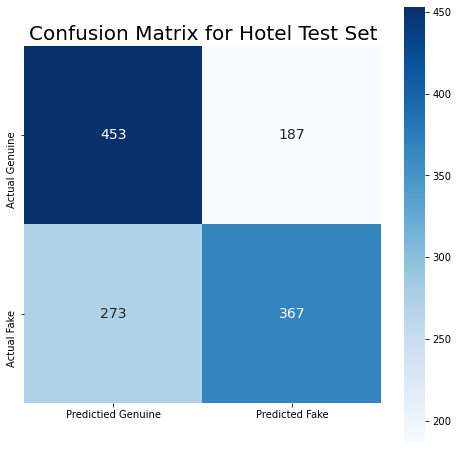

In [40]:
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix for Hotel Test Set', fontsize=20)
ylabel = ['Actual Genuine', 'Actual Fake']
xlabel = ['Predictied Genuine', 'Predicted Fake']
bigram_cm = cm(uni_gmm_df['target'], uni_gmm_df['predict'])
sns.heatmap(bigram_cm, annot=True, fmt='d', xticklabels=xlabel, yticklabels=ylabel,
            annot_kws={'size':14}, cmap='Blues', square=True)
#plt.savefig('../ppt/Hotel_CM_test.png')

In [41]:
f1_score(uni_gmm_df['target'], uni_gmm_df['predict'])

0.6147403685092128

# Yelp Piped by Topic

In [66]:
yelp_raw_df = pd.read_pickle('../pickles/short_reviews.pkl')

In [67]:
yelp_raw_df.rename({'text_cl':'text'}, axis=1, inplace=True)

In [68]:
yelp_nmf = nmf_obj()
yelp_nmf.tdm = bigram_nmf.tfidf.transform(yelp_raw_df['text'])
yelp_nmf.nmf_topic = bigram_nmf.nmf.transform(yelp_nmf.tdm)

yelp_nmf.nmf = bigram_nmf.nmf
yelp_nmf.tfidf = bigram_nmf.tfidf
yelp_nmf.feature_names = bigram_nmf.feature_names
yelp_nmf.display_topics()

        0         1            2       3        4
0  servic      like        hotel  luxuri   experi
1   check      desk       reserv    told     time
2   night  bathroom          bed   floor     good
3   staff  friendli        clean    help  definit
4   great     locat  great locat    view     nice


In [69]:
yelp_raw_df

,reviewerID,reviewContent,flagged,text
0,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",N,unlik next previou night dish complet recogniz...
1,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,N,probabl one best meal ever perform food grant ...
2,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,N,servic impecc experi present cool balloon fun ...
3,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",N,problem place like exhorbit cost media attent ...
4,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,N,idea write review alinea bring whole differ pe...
...,...,...,...,...
67014,fUXNHG4x1AN9oPpBSpCtUw,I've passed this place a bunch of times on my ...,N,place bunch time way olymp northwest cutleri t...
67015,QQCm2oqSnnz24Z-yHeMtxQ,Rubino's is not really setup as a retail opera...,N,rubino realli setup retail oper price inexpens...
67016,OXRKydSyzC35n2fNUnbopg,This place is amazing. Â The food is great and...,N,place food great beat price unfortun waist lin...
67017,NE8ULc362aFvnkTDgvZbcA,OK went back the next day as I was driving by ...,N,back next day lunchtim steak torta instead chi...


In [70]:
yelp_df = yelp_nmf.export_topic_df()

In [71]:
yelp_raw_df

,reviewerID,reviewContent,flagged,text
0,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",N,unlik next previou night dish complet recogniz...
1,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,N,probabl one best meal ever perform food grant ...
2,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,N,servic impecc experi present cool balloon fun ...
3,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",N,problem place like exhorbit cost media attent ...
4,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,N,idea write review alinea bring whole differ pe...
...,...,...,...,...
67014,fUXNHG4x1AN9oPpBSpCtUw,I've passed this place a bunch of times on my ...,N,place bunch time way olymp northwest cutleri t...
67015,QQCm2oqSnnz24Z-yHeMtxQ,Rubino's is not really setup as a retail opera...,N,rubino realli setup retail oper price inexpens...
67016,OXRKydSyzC35n2fNUnbopg,This place is amazing. Â The food is great and...,N,place food great beat price unfortun waist lin...
67017,NE8ULc362aFvnkTDgvZbcA,OK went back the next day as I was driving by ...,N,back next day lunchtim steak torta instead chi...


In [72]:
yelp_feat = add_features_to_topics(yelp_df, yelp_raw_df)

In [73]:
yelp_feat

,"servic,like,hotel,luxuri,experi","check,desk,reserv,told,time","night,bathroom,bed,floor,good","staff,friendli,clean,help,definit","great,locat,great locat,view,nice",tb_subjective,polarity
0,0.070910,0.110557,0.014336,0.029449,0.000000,0.448713,0
1,0.063246,0.031662,0.000000,0.026060,0.000000,0.400000,1
2,0.121456,0.036108,0.000000,0.000000,0.000000,0.283333,0
3,0.129793,0.069479,0.005381,0.000000,0.000957,0.333264,0
4,0.079747,0.052888,0.000000,0.054346,0.032193,0.358333,0
...,...,...,...,...,...,...,...
67014,0.032355,0.074172,0.000000,0.043012,0.063176,0.640909,1
67015,0.071240,0.000000,0.052887,0.000000,0.000000,0.600000,1
67016,0.077880,0.000000,0.000000,0.000000,0.108158,0.605556,1
67017,0.089488,0.014224,0.000000,0.000000,0.013857,0.226389,0


In [74]:
yelp_feat_sc = scaler.transform(yelp_feat)

In [75]:
yelp_clust_pred = bigram_gmm.predict(yelp_feat_sc)
yelp_bigram_result = yelp_feat.copy()
yelp_bigram_result['cluster'] = yelp_clust_pred
yelp_bigram_result['predict'] = yelp_bigram_result['cluster'].map({0:1, 1:0, 2:1, 3:1, 4:0, 5:0, 6:0, 7:1})

In [76]:
yelp_bigram_result['target'] = yelp_raw_df['flagged'].map({'Y':1,'N':0})

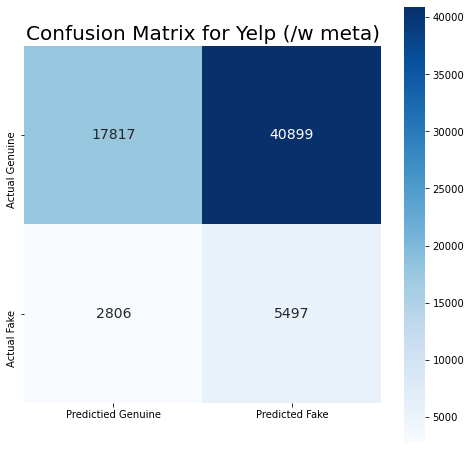

In [77]:
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix for Yelp (/w meta)', fontsize=20)
ylabel = ['Actual Genuine', 'Actual Fake']
xlabel = ['Predictied Genuine', 'Predicted Fake']
bigram_cm = cm(yelp_bigram_result['target'], yelp_bigram_result['predict'])
sns.heatmap(bigram_cm, annot=True, fmt='d', xticklabels=xlabel, yticklabels=ylabel,
            annot_kws={'size':14}, cmap='Blues', square=True)
plt.show()


In [78]:
f1_score(yelp_bigram_result['target'], yelp_bigram_result['predict'])

0.20099087734693505

In [79]:
yelp_bigram_result[yelp_bigram_result['target']==1]

,"servic,like,hotel,luxuri,experi","check,desk,reserv,told,time","night,bathroom,bed,floor,good","staff,friendli,clean,help,definit","great,locat,great locat,view,nice",tb_subjective,polarity,cluster,predict,target
58589,0.015911,0.021526,0.040329,0.025601,0.000000,0.000000,0,6,0,1
58590,0.121059,0.012197,0.060201,0.020960,0.011215,0.367872,0,7,1,1
58591,0.075779,0.000000,0.000000,0.063256,0.000358,0.000000,0,7,1,1
58592,0.075779,0.000000,0.000000,0.063256,0.000358,0.000000,0,7,1,1
58593,0.066191,0.045516,0.000000,0.024852,0.000000,0.300000,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
66887,0.111487,0.021022,0.000000,0.072934,0.000000,0.328571,1,3,1,1
66888,0.084851,0.086813,0.000000,0.000000,0.052774,0.410262,0,7,1,1
66889,0.068351,0.000000,0.001529,0.005347,0.108333,0.650000,1,1,0,1
66890,0.067913,0.000000,0.000000,0.040701,0.077412,0.700000,1,3,1,1


In [80]:
yelp_raw_df.loc[66887,'reviewContent']

"I've been back twice since my first post and every visit has been just as good as the last.The food is fantastic, fresh tasting and the portions are sizeable.Raul is the bomb and he will not lead you astray - trust his recommendations! He'll hook you up with the best dishes they have to offer and I respect that he's not trying to sell you on the most expensive item on the menu. Everyone who works here is polite and friendly. They are always busy for dinner service but not once have I ever felt rushed to finish my meal. The servers don't hover or check in on you a million times. They let you enjoy your visit.If you haven't tried this place yet - make it happen! You will not be disappointed."

In [81]:
bigram_gmm.predict_proba(yelp_feat_sc)

array([[7.65475791e-03, 3.15658960e-08, 7.18687561e-08, ...,
        7.22918661e-08, 7.50767581e-04, 3.93229766e-01],
       [1.19047293e-04, 1.70599869e-05, 1.31566910e-04, ...,
        8.26467938e-05, 1.84167700e-05, 7.49913444e-03],
       [2.24101658e-06, 1.85781385e-10, 1.86487431e-12, ...,
        8.46270663e-12, 1.81405392e-06, 9.99948602e-01],
       ...,
       [2.16536083e-04, 6.50656006e-01, 3.08388434e-05, ...,
        8.38815456e-05, 4.20020847e-08, 2.08475969e-04],
       [1.61764460e-05, 2.10016903e-08, 8.63430228e-11, ...,
        9.11781944e-10, 1.66840582e-04, 9.99580357e-01],
       [1.18179550e-04, 3.45504326e-04, 9.69910745e-05, ...,
        3.10855883e-01, 2.92263641e-01, 5.96427694e-03]])

# Using unigram model

In [82]:
yelp_uni_nmf = nmf_obj()
yelp_uni_nmf.tdm = unigram_nmf.tfidf.transform(yelp_raw_df['text'])
yelp_uni_nmf.nmf_topic = unigram_nmf.nmf.transform(yelp_uni_nmf.tdm)

yelp_uni_nmf.nmf = unigram_nmf.nmf
yelp_uni_nmf.tfidf = unigram_nmf.tfidf
yelp_uni_nmf.feature_names = unigram_nmf.feature_names
yelp_uni_nmf.display_topics()

        0         1       2      3        4
0  servic      like   hotel  place   luxuri
1   check      desk  reserv   told    minut
2   night  bathroom     bed  floor     good
3   staff  friendli   clean   help  definit
4   great     locat    view   citi     shop


In [83]:
yelp_uni_df = yelp_uni_nmf.export_topic_df()

In [84]:
yelp_uni_df

,"servic,like,hotel,place,luxuri","check,desk,reserv,told,minut","night,bathroom,bed,floor,good","staff,friendli,clean,help,definit","great,locat,view,citi,shop"
0,0.074206,0.107633,0.011674,0.028344,0.000000
1,0.063227,0.031344,0.000000,0.024335,0.000000
2,0.117353,0.039883,0.000000,0.000000,0.000000
3,0.129399,0.068521,0.006175,0.000000,0.001499
4,0.080536,0.052348,0.000000,0.047996,0.034474
...,...,...,...,...,...
67014,0.033133,0.071175,0.000000,0.040382,0.065588
67015,0.072545,0.000000,0.052792,0.000000,0.000000
67016,0.079123,0.000000,0.000000,0.000000,0.113188
67017,0.095387,0.008429,0.000000,0.000000,0.014865


In [85]:
yelp_uni_clust_pred = uni_gmm.predict(yelp_uni_df)

In [86]:
uni_gmm.means_

array([[0.0290862 , 0.03250956, 0.11245871, 0.0294766 , 0.02238577],
       [0.03334055, 0.14270071, 0.0373902 , 0.01734141, 0.01248069],
       [0.02923589, 0.02079246, 0.02619387, 0.11185507, 0.0270666 ],
       [0.08803833, 0.03210181, 0.02795578, 0.02888234, 0.01611449],
       [0.02924734, 0.01980987, 0.04102133, 0.04570983, 0.13547351]])

In [87]:
yelp_uni_results = yelp_uni_df.copy()
yelp_uni_results['cluster'] = yelp_uni_clust_pred
yelp_uni_results['predict'] = yelp_uni_results['cluster'].map({0:0, 1:0, 2:1, 3:1, 4:0})

In [88]:
yelp_uni_results['target'] = yelp_raw_df['flagged'].map({'Y':1,'N':0})

In [89]:
yelp_uni_results

,"servic,like,hotel,place,luxuri","check,desk,reserv,told,minut","night,bathroom,bed,floor,good","staff,friendli,clean,help,definit","great,locat,view,citi,shop",cluster,predict,target
0,0.074206,0.107633,0.011674,0.028344,0.000000,1,0,0
1,0.063227,0.031344,0.000000,0.024335,0.000000,3,1,0
2,0.117353,0.039883,0.000000,0.000000,0.000000,3,1,0
3,0.129399,0.068521,0.006175,0.000000,0.001499,3,1,0
4,0.080536,0.052348,0.000000,0.047996,0.034474,3,1,0
...,...,...,...,...,...,...,...,...
67014,0.033133,0.071175,0.000000,0.040382,0.065588,3,1,0
67015,0.072545,0.000000,0.052792,0.000000,0.000000,3,1,0
67016,0.079123,0.000000,0.000000,0.000000,0.113188,4,0,0
67017,0.095387,0.008429,0.000000,0.000000,0.014865,3,1,0


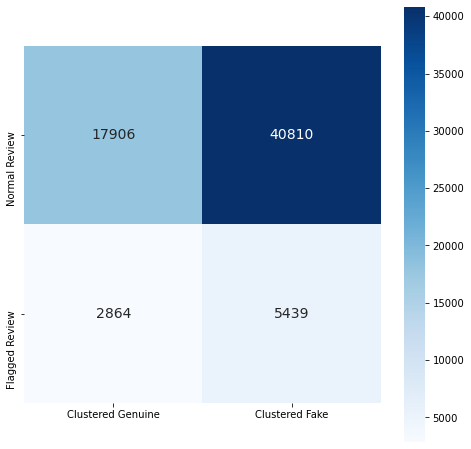

In [90]:
plt.figure(figsize=(8,8))
ylabel = ['Normal Review', 'Flagged Review']
xlabel = ['Clustered Genuine', 'Clustered Fake']
bigram_cm = cm(yelp_uni_results['target'], yelp_uni_results['predict'])
sns.heatmap(bigram_cm, annot=True, fmt='d', xticklabels=xlabel, yticklabels=ylabel,
            annot_kws={'size':14}, cmap='Blues', square=True)
plt.savefig('../ppt/Yelp_CM.png')

In [91]:
f1_score(yelp_uni_results['target'], yelp_uni_results['predict'])

0.19940607127144744

# Visualization

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
plt.figure(figsize=(10,6))
test_viz = TSNE(n_components=2, random_state=444,verbose=1)
low_data = test_viz.fit_transform(yelp_uni_df)

sns.scatterplot(low_data[:,0], 
                low_data[:,1],
                hue=yelp_uni_results['cluster'],
               palette=sns.color_palette('hls', 5),
               legend='full',
               alpha=0.3)
plt.savefig('../ppt/t-SNE_GMM.png')

In [ ]:
# hotel clustering viz with T-SNE
plt.figure(figsize=(10,6))
hotel_viz = TSNE(n_components=2, random_state=444,verbose=1)
hotel_data = hotel_viz.fit_transform(unigram_df)

sns.scatterplot(hotel_data[:,0], 
                hotel_data[:,1],
                hue=unigram_result['cluster'],
               palette=sns.color_palette('hls', 5),
               legend='full',
               alpha=0.3)
plt.savefig('../ppt/t-SNE_Hotel_GMM.png')

In [ ]:
# PCA yelp plot
plt.figure(figsize=(10,6))
pca_yelp = PCA(n_components=2)
pca_yelp_result = pca_yelp.fit_transform(yelp_uni_df)

sns.scatterplot(pca_result[:,0], 
                pca_result[:,1],
                hue=yelp_uni_results['cluster'],
               palette=sns.color_palette('hls', 5),
               legend='full',
               alpha=0.3)

In [ ]:
# PCA hotel plot
plt.figure(figsize=(10,6))
pca_hotel = PCA(n_components=2)
pca_hotel_result = pca_hotel.fit_transform(unigram_df)

sns.scatterplot(pca_hotel_result[:,0], 
                pca_hotel_result[:,1],
                hue=unigram_result['cluster'],
               palette=sns.color_palette('hls', 7),
               legend='full',
               alpha=0.3)

# Aggregate the list?

In [ ]:
uni_fake = yelp_uni_results
yelp_bigram_result